<a href="https://colab.research.google.com/github/nelaaulina/AI-Praktikum_G.231.20.0164/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Pecah dataset menjadi 3 data (train:val:test)
!pip install split-folders
import splitfolders
splitfolders.ratio('../PCD/Train', output="ds", seed=1337, ratio=(.7, 0.2, 0.1))


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_dir = "./ds/train"
val_dir = "./ds/val"
test_dir = "./ds/test"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE)

Found 238 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE)

Found 67 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE)

Found 37 files belonging to 2 classes.


['Bleached', 'Unbleached']


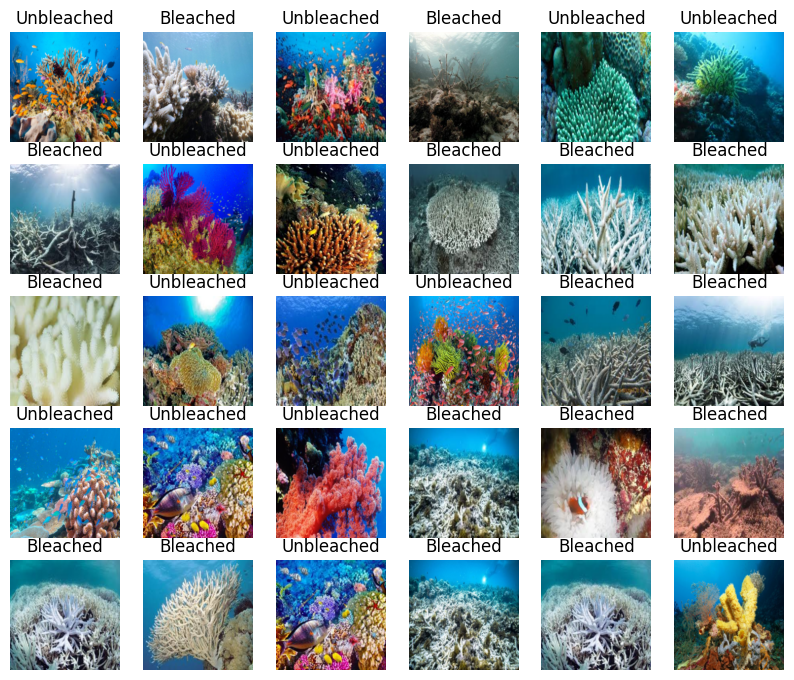

In [ ]:
label_names = train_ds.class_names
print(label_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(30):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(label_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds= val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)
print(train_ds)
print(val_ds)
print(test_ds)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
data_augmentation = tf.keras.Sequential([ tf.keras.layers.RandomFlip("horizontal_and_vertical"),
                                          tf.keras.layers.RandomRotation(0.3),
                                          tf.keras.layers.RandomContrast(0.2),
                                          tf.keras.layers.RandomBrightness(0.2)
                                        ])

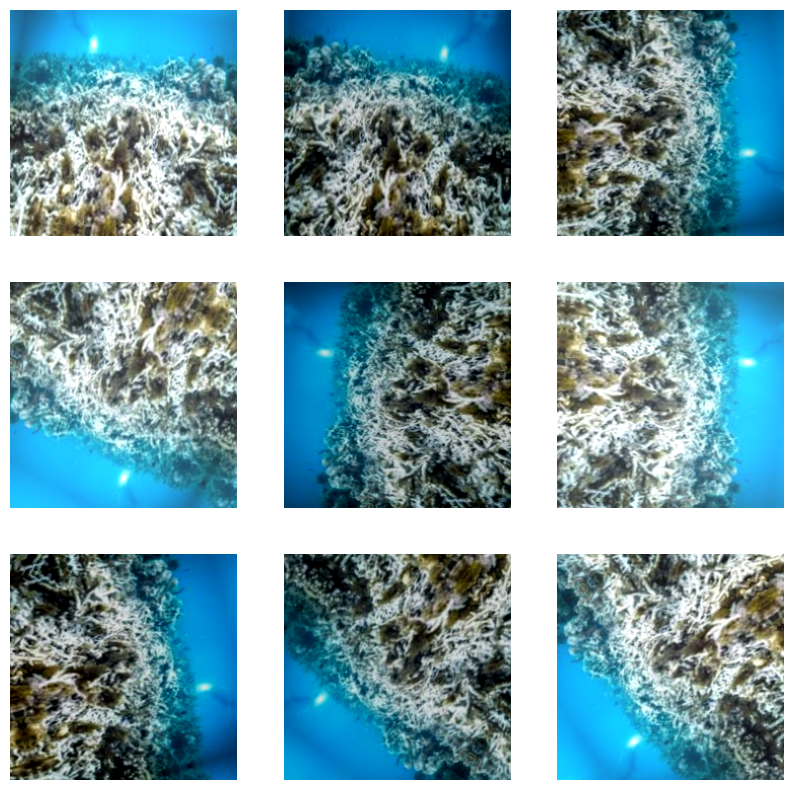

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
# Create the base model from the pre-trained model VGG-16
# buat objek vgg16
vgg_model = VGG16()

In [ ]:
model_with_da = keras.Sequential([data_augmentation, model])

In [ ]:

# buat model baru dengan meng-copy struktur dari model vgg16
model = keras.Sequential(vgg_model.layers[:-1])


In [ ]:
# tambahkan lapisan output baru
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# "freeze" lapisan awal dari model vgg16
for layer in model.layers[:-1]:
  layer.trainable = False

In [ ]:
model_with_da.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# latih model dengan dataset yang telah disiapkan
hist = model_with_da.fit(train_ds, epochs=10, batch_size=32, validation_data=val_ds)

#

Epoch 1/10
8/8 [==============================] - 185s 18s/step - loss: 6.6762 - accuracy: 0.0000e+00 - val_loss: 6.7288 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 134s 17s/step - loss: 6.6271 - accuracy: 0.0000e+00 - val_loss: 6.7288 - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 131s 16s/step - loss: 6.6232 - accuracy: 0.0000e+00 - val_loss: 6.7288 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 132s 17s/step - loss: 6.6766 - accuracy: 0.0000e+00 - val_loss: 6.7288 - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 127s 15s/step - loss: 6.6645 - accuracy: 0.0000e+00 - val_loss: 6.7288 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 122s 16s/step - loss: 6.6440 - accuracy: 0.0000e+00 - val_loss: 6.7288 - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 121s 15s/step - loss: 6.6638 - accuracy: 0.0000e+00 - val_loss

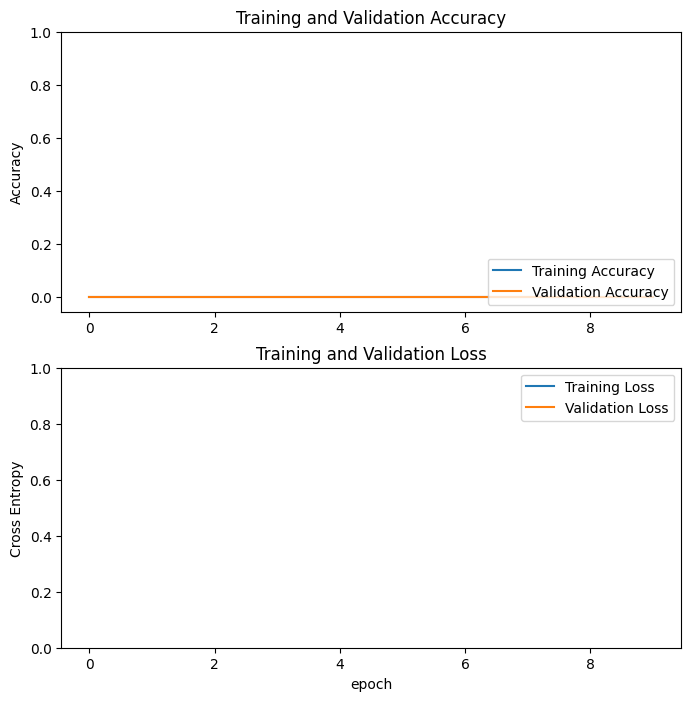

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(vgg_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 23

# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  23


Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1]


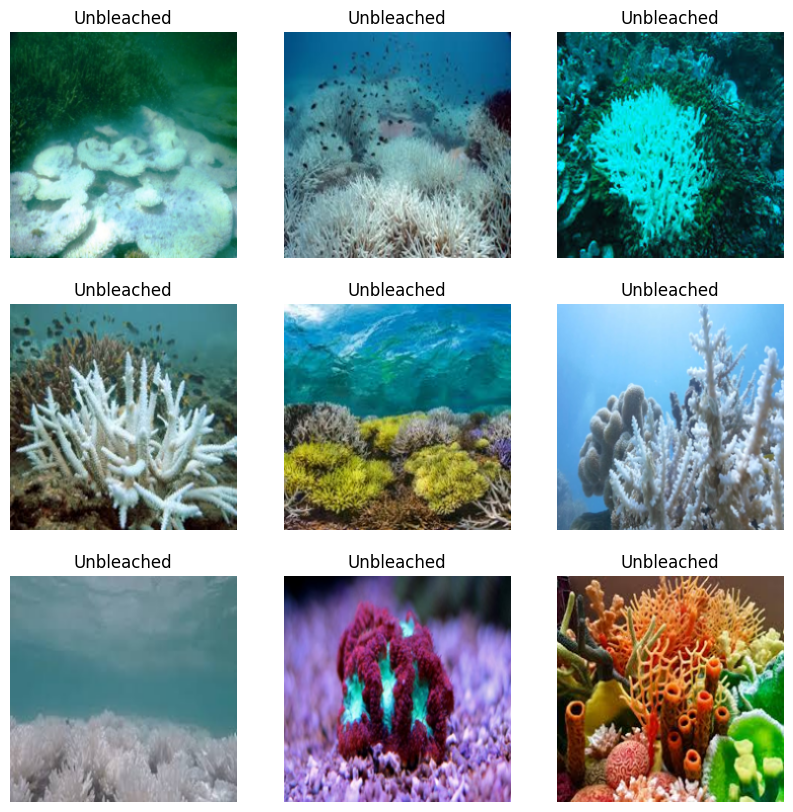

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(label_names[predictions[i]])
  plt.axis("off")

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_ds)

report = classification_report(label_batch, predictions, target_names=label_names)
print(report)

2/2 [==============================] - 16s 2s/step
              precision    recall  f1-score   support

    Bleached       0.00      0.00      0.00        18
  Unbleached       0.44      1.00      0.61        14

    accuracy                           0.44        32
   macro avg       0.22      0.50      0.30        32
weighted avg       0.19      0.44      0.27        32



C:\Users\faizal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\faizal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\faizal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

2/2 [==============================] - 30s 3s/step


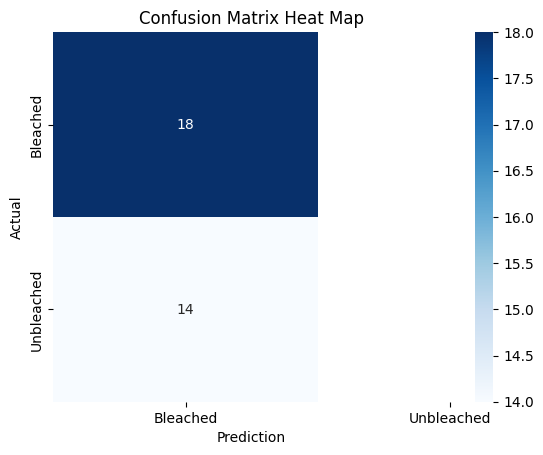

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
# memprediksi label dari data uji menggunakan model yang telah terlatih
y_pred = model.predict(test_ds)

# menambahkan prediksi dan kelas aktual ke confusion matrix
confusion_matrix = pd.crosstab(label_batch, predictions, rownames=['Actual'], colnames=['Predictions'])

# tampilkan heat map confusion matrix menggunakan seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.title('Confusion Matrix Heat Map')
plt.show()
